In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
data = pd.read_excel('ENB2012_data.xlsx')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [2]:
columns = ["Relative_Compactness", "Surface_Area", "Wall_Area", "Roof_Area", "Overall_Height",
           "Orientation", "Glazing_Area", "Glazing_Area_Distribution", "Heating_Load", "Cooling_Load"]
data.columns = columns
data.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [3]:
data.corr()['Heating_Load']

Relative_Compactness         0.622272
Surface_Area                -0.658120
Wall_Area                    0.455671
Roof_Area                   -0.861828
Overall_Height               0.889430
Orientation                 -0.002587
Glazing_Area                 0.269842
Glazing_Area_Distribution    0.087368
Heating_Load                 1.000000
Cooling_Load                 0.975862
Name: Heating_Load, dtype: float64

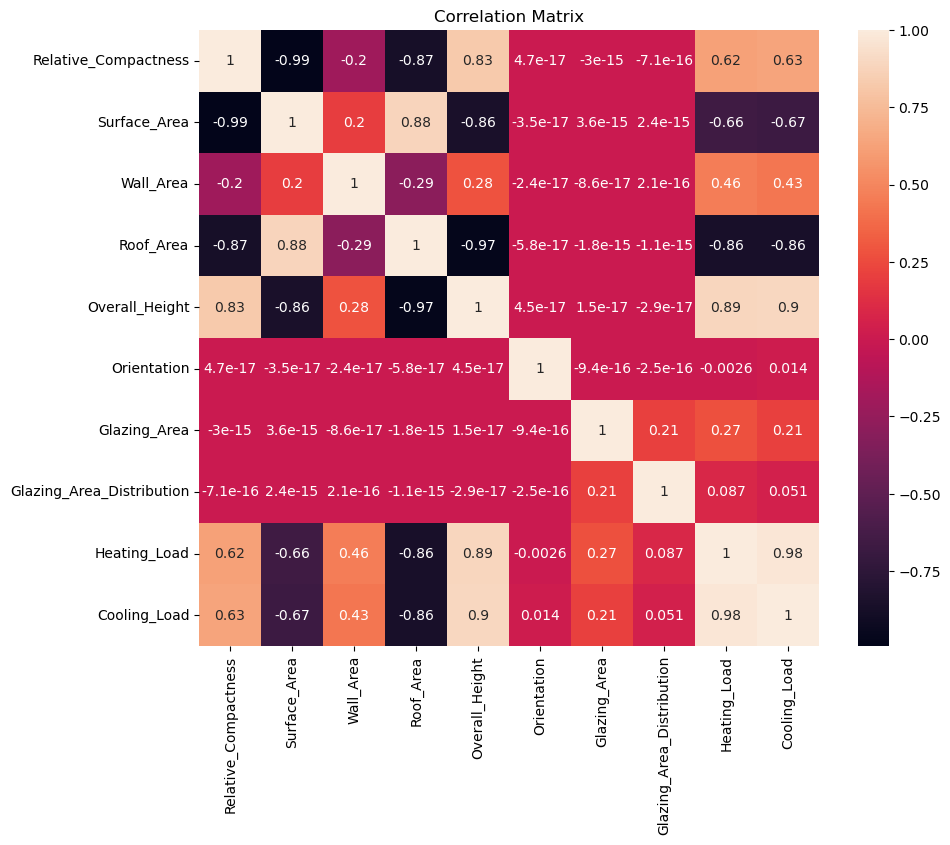

In [4]:
#correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

[Text(0, 0, 'Relative_Compactness'),
 Text(1, 0, 'Surface_Area'),
 Text(2, 0, 'Wall_Area'),
 Text(3, 0, 'Roof_Area'),
 Text(4, 0, 'Overall_Height'),
 Text(5, 0, 'Orientation'),
 Text(6, 0, 'Glazing_Area'),
 Text(7, 0, 'Glazing_Area_Distribution'),
 Text(8, 0, 'Heating_Load'),
 Text(9, 0, 'Cooling_Load')]

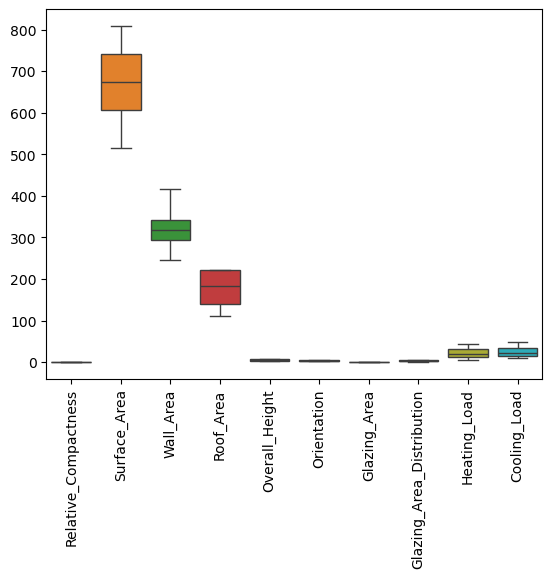

In [5]:
plot = sns.boxplot(data)
plot.set_xticklabels(plot.get_xticklabels(),rotation =90)

<Axes: >

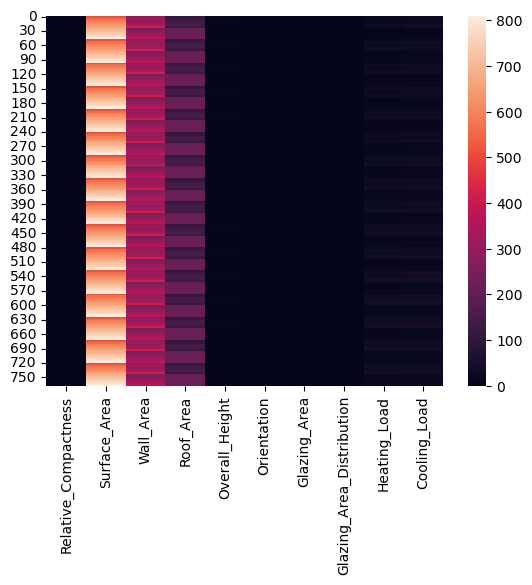

In [6]:
sns.heatmap(data)

Splitting the dataset in 80:20 ratio

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [8]:
x = data.drop(columns = ['Heating_Load','Cooling_Load','Orientation','Glazing_Area_Distribution'])
y = data['Heating_Load']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

Manual Linear regression

In [10]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled_bias = np.c_[np.ones(x_train_scaled.shape[0]), x_train_scaled]

theta = np.linalg.inv(x_train_scaled_bias.T @ x_train_scaled_bias) @ x_train_scaled_bias.T @ y_train

x_test_scaled = scaler.transform(x_test)  
x_test_scaled_bias = np.c_[np.ones(x_test_scaled.shape[0]), x_test_scaled]  


train_predicted_manual_lr = x_train_scaled_bias @ theta
test_predicted_manual_lr = x_test_scaled_bias @ theta

In [11]:
train_mse_manual_lr = mean_squared_error(y_train, train_predicted_manual_lr)
test_mse_manual_lr = mean_squared_error(y_test, test_predicted_manual_lr)
train_r2_manual_lr= r2_score(y_train, train_predicted_manual_lr)
test_r2_manual_lr = r2_score(y_test, test_predicted_manual_lr)
train_rmse_manual_lr = root_mean_squared_error(y_train, train_predicted_manual_lr)
test_rmse_manual_lr = root_mean_squared_error(y_test, test_predicted_manual_lr)

In [12]:
print(f'''
Manual Linear Regression:
Train: MSE - {train_mse_manual_lr:}
       RMSE - {train_rmse_manual_lr} 
       R2 - {train_r2_manual_lr}
Test:  MSE - {test_mse_manual_lr}
       RMSE - {test_rmse_manual_lr} 
       R2 - {test_r2_manual_lr}''')


Manual Linear Regression:
Train: MSE - 37.98345240558633
       RMSE - 6.163071669677899 
       R2 - 0.6236426874294472
Test:  MSE - 42.8668268381193
       RMSE - 6.547276291567304 
       R2 - 0.5887380217585563


Training a linear regression model

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [14]:
train_pred_lr = lr.predict(x_train)
test_pred_lr = lr.predict(x_test)

In [15]:
train_mse_lr = mean_squared_error(y_train, train_pred_lr)
test_mse_lr = mean_squared_error(y_test, test_pred_lr)
train_r2_lr= r2_score(y_train, train_pred_lr)
test_r2_lr = r2_score(y_test, test_pred_lr)
train_rmse_lr = root_mean_squared_error(y_train, train_pred_lr)
test_rmse_lr = root_mean_squared_error(y_test, test_pred_lr)

In [16]:
print(f'''
Linear Regression:
Train: MSE - {train_mse_lr:}
       RMSE - {train_rmse_lr} 
       R2 - {train_r2_lr}
Test:  MSE - {test_mse_lr}
       RMSE - {test_rmse_lr} 
       R2 - {test_r2_lr}''')


Linear Regression:
Train: MSE - 8.492072234604036
       RMSE - 2.914116029708501 
       R2 - 0.9158566880587049
Test:  MSE - 9.238907458975815
       RMSE - 3.0395571155969114 
       R2 - 0.9113624301440194


Manual Linear regression and Linear regression using sklearn are almost same.

Training a lasso regression model and ridge regression model

In [26]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
alpha = 0.1
lasso = Lasso(alpha = alpha)
lasso.fit(x_train,y_train)

Lasso(alpha=0.1)

In [27]:
train_pred_lasso = lasso.predict(x_train)
test_pred_lasso = lasso.predict(x_test)

In [28]:
train_mse_lasso = mean_squared_error(y_train, train_pred_lasso)
test_mse_lasso = mean_squared_error(y_test, test_pred_lasso)
train_r2_lasso= r2_score(y_train, train_pred_lasso)
test_r2_lasso = r2_score(y_test, test_pred_lasso)
train_rmse_lasso = root_mean_squared_error(y_train, train_pred_lasso)
test_rmse_lasso = root_mean_squared_error(y_test, test_pred_lasso)

In [29]:
print(f'''
Lasso Regression:
Train: MSE - {train_mse_lasso:}
       RMSE - {train_rmse_lasso} 
       R2 - {train_r2_lasso}
Test:  MSE - {test_mse_lasso}
       RMSE - {test_rmse_lasso} 
       R2 - {test_r2_lasso}''')


Lasso Regression:
Train: MSE - 9.500623056609463
       RMSE - 3.0823080729559567 
       R2 - 0.9058635080573799
Test:  MSE - 10.151703859907897
       RMSE - 3.186173859020863 
       R2 - 0.9026051116936326


In [30]:
ridge = Ridge(alpha=alpha)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [31]:
train_pred_ridge = ridge.predict(x_train)
test_pred_ridge = ridge.predict(x_test)

In [32]:
train_mse_ridge = mean_squared_error(y_train, train_pred_ridge)
test_mse_ridge= mean_squared_error(y_test, test_pred_ridge)
train_r2_ridge= r2_score(y_train, train_pred_ridge)
test_r2_ridge= r2_score(y_test, test_pred_ridge)
train_rmse_ridge = root_mean_squared_error(y_train, train_pred_ridge)
test_rmse_ridge = root_mean_squared_error(y_test, test_pred_ridge)

In [33]:
print(f'''
Ridge Regression:
Train: MSE - {train_mse_ridge}
       RMSE - {train_rmse_ridge} 
       R2 - {train_r2_ridge}
Test:  MSE - {test_mse_ridge}
       RMSE - {test_rmse_ridge} 
       R2 - {test_r2_ridge}''')


Ridge Regression:
Train: MSE - 8.624315105621017
       RMSE - 2.9367184246401656 
       R2 - 0.9145463655790336
Test:  MSE - 9.467610241795692
       RMSE - 3.0769482026507515 
       R2 - 0.9091682682283959


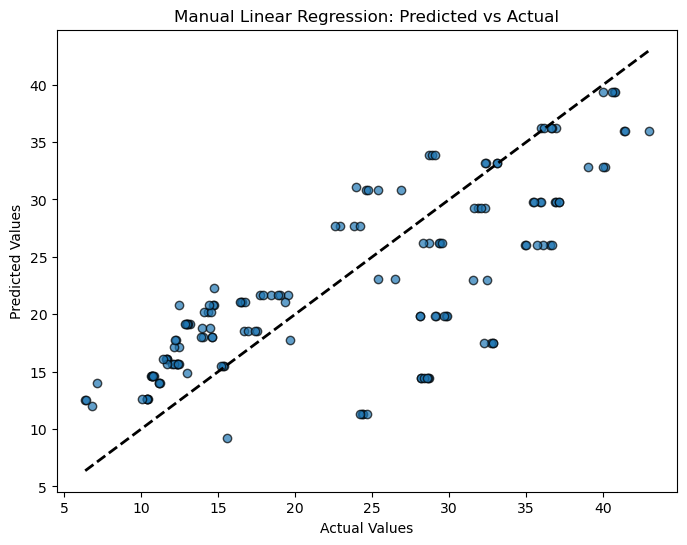

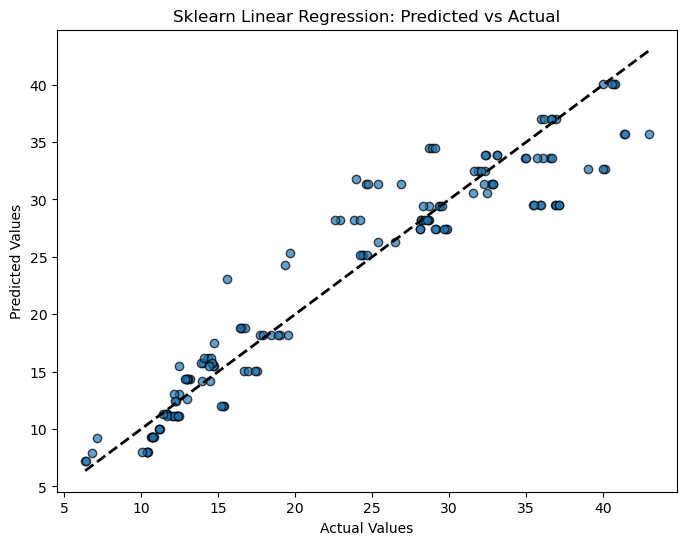

In [34]:
# Plot function
def plot_predictions(y_actual, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_actual, y_pred, alpha=0.7, edgecolors='k')
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--', lw=2)
    plt.title(title)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.show()

# Plot for manual implementation
plot_predictions(y_test, test_predicted_manual_lr, "Manual Linear Regression: Predicted vs Actual")

# Plot for sklearn linear regression
plot_predictions(y_test, test_pred_lr, "Sklearn Linear Regression: Predicted vs Actual")


Energy Efficiency Improvement Suggestions:
1. Focus on optimizing features with the highest positive coefficients:
   - Overall Height has the highest positive coefficient, suggesting that reducing the height or optimizing the design can help reduce heating load. Consider designing shorter buildings to minimize heating needs.
   - Glazing Area also contributes positively to heating load. Minimize the glazing area or use energy-efficient glazing solutions to reduce heat loss.

2. Minimize or optimize features with negative coefficients:
   - Relative Compactness has the strongest negative coefficient, which means increasing the compactness of the building (less exposed surface area) can reduce heating load. Design buildings with a compact shape to reduce energy consumption.
   - Surface Area and Roof Area have negative coefficients, suggesting that reducing the surface area or improving roof insulation can decrease energy consumption. Prioritize insulation of walls and roof areas to minimize heat loss.

3. Optimize Wall and Roof Area:
   - Wall Area has a moderate positive effect on heating load. Insulate walls effectively to minimize heat loss, reducing the heating load.
   - Roof Area has a negative coefficient, meaning that improving roof insulation will help reduce heating needs. Focus on reducing roof area if possible or insulating roofs better.

4. Consider Building Orientation and Glazing Distribution:
   - Orientation has a minor positive effect on heating load. Optimize building orientation to maximize sunlight exposure during colder months, helping to reduce heating requirements.
   - Glazing Area Distribution has a small positive effect. Design the distribution of windows to optimize natural lighting and reduce the need for artificial heating.